🔹 Sample Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔍 Null or Zero counts per column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                          

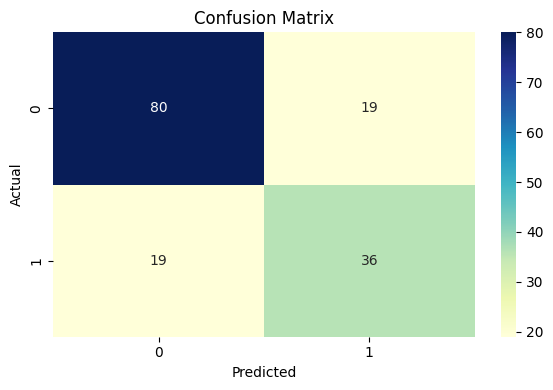

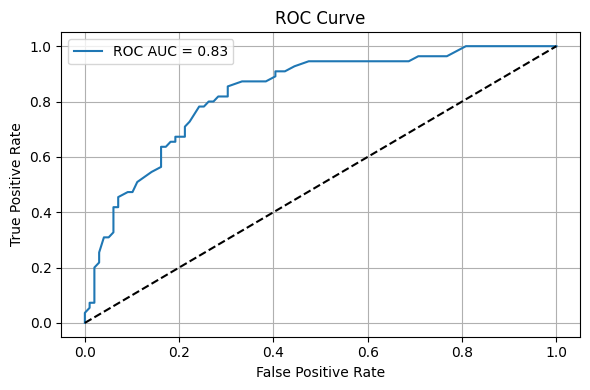

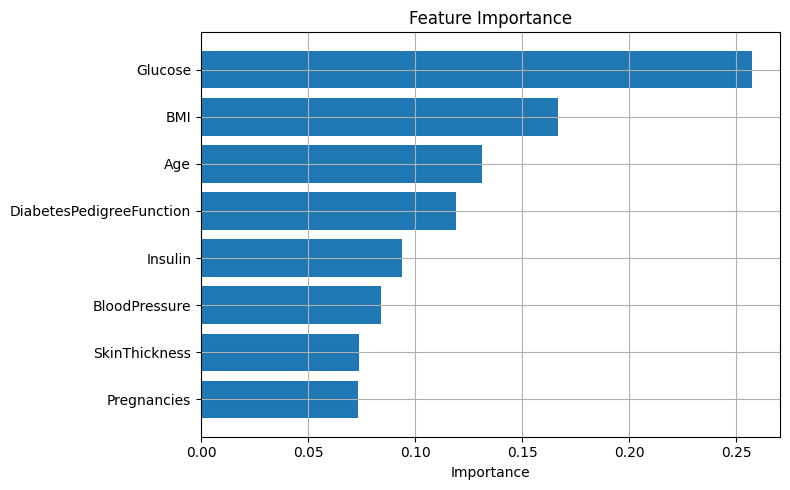

In [1]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for screenshots
os.makedirs("screenshots", exist_ok=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# ✅ Step 2: Load Dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url)

print("🔹 Sample Data:")
print(data.head())

# ✅ Step 3: Preprocessing (check for missing/zero)
print("\n🔍 Null or Zero counts per column:")
print((data == 0).sum())

# Replace 0s in some columns where 0 is not possible
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# ✅ Step 4: Define Features and Target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 7: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 8: Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ✅ Step 9: Evaluation
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("screenshots/confusion_matrix.png")
plt.show()

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("screenshots/roc_curve.png")
plt.show()

# ✅ Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.savefig("screenshots/feature_importance.png")
plt.show()
